In [184]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv("Q4.csv")

total_instances = len(data)
survived_instances = data[data["Survived"] == 1]
not_survived_instances = data[data["Survived"] == 0]
p_survived = len(survived_instances) / total_instances
p_not_survived = len(not_survived_instances) / total_instances

original_gini_impurity = 1 - (p_survived**2 + p_not_survived**2)
print("Original Gini Impurity:", original_gini_impurity)

male_instances = data[data["Gender"] == 1]
female_instances = data[data["Gender"] == 0]

total_male = len(male_instances)
survived_male = male_instances[male_instances["Survived"] == 1]
not_survived_male = male_instances[male_instances["Survived"] == 0]
p_survived_male = len(survived_male) / total_male
p_not_survived_male = len(not_survived_male) / total_male
gini_male = 1 - (p_survived_male**2 + p_not_survived_male**2)

total_female = len(female_instances)
survived_female = female_instances[female_instances["Survived"] == 1]
not_survived_female = female_instances[female_instances["Survived"] == 0]
p_survived_female = len(survived_female) / total_female
p_not_survived_female = len(not_survived_female) / total_female
gini_female = 1 - (p_survived_female**2 + p_not_survived_female**2)

weighted_gini_impurity = (total_male / total_instances) * gini_male + (
    total_female / total_instances
) * gini_female
print("Weighted Gini Impurity after split on gender:", weighted_gini_impurity)

Original Gini Impurity: 0.4730129578614428
Weighted Gini Impurity after split on gender: 0.3333650003885904


Impurity become more important when the decision tree is deciding on a split
between a numerical variable compared to a categorical variable due to the
nature of how splits are evaluated. When splitting on a categorical variable
(e.g., gender, color), the decision tree algorithm simply has to consider the
different categories present in that variable. It calculates impurity based on
the distribution of classes within each category. The impurity measure assesses
how mixed or impure the classes are within each category.

However, when dealing with a numerical variable (e.g., age, income), the decision tree algorithm needs to determine where to place the split points along the numerical range. This introduces a potential infinite number of split points, which makes the decision of where to split more complex. Impurity measures play a crucial role here in evaluating which split points result in the best separation of classes.

In this context, impurity measures help the decision tree algorithm assess the quality of each split point by quantifying how well it separates the classes into more homogeneous groups. The split points that result in lower impurity are preferred because they lead to more accurate and effective decision boundaries.

In [185]:
age_below_25 = data[data["Age"] <= 25]
age_above_25 = data[data["Age"] > 25]

total_below_25 = len(age_below_25)
survived_below_25 = age_below_25[age_below_25["Survived"] == 1]
not_survived_below_25 = age_below_25[age_below_25["Survived"] == 0]
p_survived_below_25 = len(survived_below_25) / total_below_25
p_not_survived_below_25 = len(not_survived_below_25) / total_below_25
gini_below_25 = 1 - (p_survived_below_25**2 + p_not_survived_below_25**2)

total_above_25 = len(age_above_25)
survived_above_25 = age_above_25[age_above_25["Survived"] == 1]
not_survived_above_25 = age_above_25[age_above_25["Survived"] == 0]
p_survived_above_25 = len(survived_above_25) / total_above_25
p_not_survived_above_25 = len(not_survived_above_25) / total_above_25
gini_above_25 = 1 - (p_survived_above_25**2 + p_not_survived_above_25**2)

weighted_gini_impurity_age_25 = (total_below_25 / total_instances) * gini_below_25 + (
    total_above_25 / total_instances
) * gini_above_25

print("Gini impurity after splitting on age <= 25:", weighted_gini_impurity_age_25)

age_below_65 = data[data["Age"] < 65]
age_above_65 = data[data["Age"] >= 65]

total_below_65 = len(age_below_65)
survived_below_65 = age_below_65[age_below_65["Survived"] == 1]
not_survived_below_65 = age_below_65[age_below_65["Survived"] == 0]
p_survived_below_65 = len(survived_below_65) / total_below_65
p_not_survived_below_65 = len(not_survived_below_65) / total_below_65
gini_below_65 = 1 - (p_survived_below_65**2 + p_not_survived_below_65**2)

total_above_65 = len(age_above_65)
survived_above_65 = age_above_65[age_above_65["Survived"] == 1]
not_survived_above_65 = age_above_65[age_above_65["Survived"] == 0]
p_survived_above_65 = len(survived_above_65) / total_above_65
p_not_survived_above_65 = len(not_survived_above_65) / total_above_65
gini_above_65 = 1 - (p_survived_above_65**2 + p_not_survived_above_65**2)

weighted_gini_impurity_age_65 = (total_below_65 / total_instances) * gini_below_65 + (
    total_above_65 / total_instances
) * gini_above_65

print("Gini impurity after splitting on age >= 65:", weighted_gini_impurity_age_65)

Gini impurity after splitting on age <= 25: 0.4729208356847512
Gini impurity after splitting on age >= 65: 0.4708677685950412


The split age >= 65 would lead to a better simple decision tree

In [186]:
age_below_25_male = male_instances[male_instances['Age'] <= 25]
age_above_25_male = male_instances[male_instances['Age'] > 25]

age_below_25_female = female_instances[female_instances['Age'] <= 25]
age_above_25_female = female_instances[female_instances['Age'] > 25]

impurity_age_below_25_male = 1 - (len(age_below_25_male[age_below_25_male['Survived'] == 1]) / len(age_below_25_male)) ** 2 - (len(age_below_25_male[age_below_25_male['Survived'] == 0]) / len(age_below_25_male)) ** 2
impurity_age_above_25_male = 1 - (len(age_above_25_male[age_above_25_male['Survived'] == 1]) / len(age_above_25_male)) ** 2 - (len(age_above_25_male[age_above_25_male['Survived'] == 0]) / len(age_above_25_male)) ** 2

impurity_age_below_25_female = 1 - (len(age_below_25_female[age_below_25_female['Survived'] == 1]) / len(age_below_25_female)) ** 2 - (len(age_below_25_female[age_below_25_female['Survived'] == 0]) / len(age_below_25_female)) ** 2
impurity_age_above_25_female = 1 - (len(age_above_25_female[age_above_25_female['Survived'] == 1]) / len(age_above_25_female)) ** 2 - (len(age_above_25_female[age_above_25_female['Survived'] == 0]) / len(age_above_25_female)) ** 2

weighted_impurity_male = (len(age_below_25_male) / total_male) * impurity_age_below_25_male + (len(age_above_25_male) / total_male) * impurity_age_above_25_male
weighted_impurity_female = (len(age_below_25_female) / total_female) * impurity_age_below_25_female + (len(age_above_25_female) / total_female) * impurity_age_above_25_female

final_impurity_gender_first = (total_male / total_instances) * weighted_impurity_male + (total_female / total_instances) * weighted_impurity_female

print("Final model impurity (split on gender first, then on age <= 25):", final_impurity_gender_first)

male_below_25 = age_below_25[age_below_25['Gender'] == 1]
female_below_25 = age_below_25[age_below_25['Gender'] == 0]

male_above_25 = age_above_25[age_above_25['Gender'] == 1]
female_above_25 = age_above_25[age_above_25['Gender'] == 0]

impurity_male_below_25 = 1 - (len(male_below_25[male_below_25['Survived'] == 1]) / len(male_below_25)) ** 2 - (len(male_below_25[male_below_25['Survived'] == 0]) / len(male_below_25)) ** 2
impurity_female_below_25 = 1 - (len(female_below_25[female_below_25['Survived'] == 1]) / len(female_below_25)) ** 2 - (len(female_below_25[female_below_25['Survived'] == 0]) / len(female_below_25)) ** 2

impurity_male_above_25 = 1 - (len(male_above_25[male_above_25['Survived'] == 1]) / len(male_above_25)) ** 2 - (len(male_above_25[male_above_25['Survived'] == 0]) / len(male_above_25)) ** 2
impurity_female_above_25 = 1 - (len(female_above_25[female_above_25['Survived'] == 1]) / len(female_above_25)) ** 2 - (len(female_above_25[female_above_25['Survived'] == 0]) / len(female_above_25)) ** 2

weighted_impurity_male_age = (len(male_below_25) / total_below_25) * impurity_male_below_25 + (len(male_above_25) / total_above_25) * impurity_male_above_25
weighted_impurity_female_age = (len(female_below_25) / total_below_25) * impurity_female_below_25 + (len(female_above_25) / total_above_25) * impurity_female_above_25

final_impurity_age_first = (total_below_25 / total_instances) * weighted_impurity_male_age + (total_above_25 / total_instances) * weighted_impurity_female_age

print("Final model impurity (split on age <= 25 first, then on gender):", final_impurity_age_first)


Final model impurity (split on gender first, then on age <= 25): 0.3324604251090154
Final model impurity (split on age <= 25 first, then on gender): 0.3252832759985814


In [187]:
# age_below_65_male = male_instances[male_instances['Age'] < 65]
# age_above_65_male = male_instances[male_instances['Age'] >= 65]

# age_below_65_female = female_instances[female_instances['Age'] < 30]
# age_above_65_female = female_instances[female_instances['Age'] >= 30]

# print("B4")
# print(age_below_65_female)
# print(len(age_below_65_female))
# print(age_above_65_female)
# print(len(age_above_65_female))
# print("A4")

# impurity_age_below_65_male = 1 - (len(age_below_65_male[age_below_65_male['Survived'] == 1]) / len(age_below_65_male)) ** 2 - (len(age_below_65_male[age_below_65_male['Survived'] == 0]) / len(age_below_65_male)) ** 2
# impurity_age_above_65_male = 1 - (len(age_above_65_male[age_above_65_male['Survived'] == 1]) / len(age_above_65_male)) ** 2 - (len(age_above_65_male[age_above_65_male['Survived'] == 0]) / len(age_above_65_male)) ** 2

# impurity_age_below_65_female = 1 - (len(age_below_65_female[age_below_65_female['Survived'] == 1]) / len(age_below_65_female)) ** 2 - (len(age_below_65_female[age_below_65_female['Survived'] == 0]) / len(age_below_65_female)) ** 2
# print(f"({len(age_above_65_female[age_above_65_female['Survived'] == 1])} / {len(age_above_65_female)}) ** 2 - ({len(age_above_65_female[age_above_65_female['Survived'] == 0])} / {len(age_above_65_female)}) ** 2")
# impurity_age_above_65_female = 1 - (len(age_above_65_female[age_above_65_female['Survived'] == 1]) / len(age_above_65_female)) ** 2 - (len(age_above_65_female[age_above_65_female['Survived'] == 0]) / len(age_above_65_female)) ** 2

# weighted_impurity_male = (len(age_below_65_male) / total_male) * impurity_age_below_65_male + (len(age_above_65_male) / total_male) * impurity_age_above_65_male
# weighted_impurity_female = (len(age_below_65_female) / total_female) * impurity_age_below_65_female + (len(age_above_65_female) / total_female) * impurity_age_above_65_female

# final_impurity_gender_first_age_65 = (total_male / total_instances) * weighted_impurity_male + (total_female / total_instances) * weighted_impurity_female

# print("Final model impurity (split on gender first, then on age for age >= 65):", final_impurity_gender_first_age_65)


# male_below_65 = age_below_65[age_below_65['Gender'] == 1]
# female_below_65 = age_below_65[age_below_65['Gender'] == 0]

# male_above_65 = age_above_65[age_above_65['Gender'] == 1]
# female_above_65 = age_above_65[age_above_65['Gender'] == 0]

# impurity_male_below_65 = 1 - (len(male_below_65[male_below_65['Survived'] == 1]) / len(male_below_65)) ** 2 - (len(male_below_65[male_below_65['Survived'] == 0]) / len(male_below_65)) ** 2
# impurity_female_below_65 = 1 - (len(female_below_65[female_below_65['Survived'] == 1]) / len(female_below_65)) ** 2 - (len(female_below_65[female_below_65['Survived'] == 0]) / len(female_below_65)) ** 2

# impurity_male_above_65 = 1 - (len(male_above_65[male_above_65['Survived'] == 1]) / len(male_above_65)) ** 2 - (len(male_above_65[male_above_65['Survived'] == 0]) / len(male_above_65)) ** 2
# impurity_female_above_65 = 1 - (len(female_above_65[female_above_65['Survived'] == 1]) / len(female_above_65)) ** 2 - (len(female_above_65[female_above_65['Survived'] == 0]) / len(female_above_65)) ** 2

# weighted_impurity_male_age = (len(male_below_65) / total_below_65) * impurity_male_below_65 + (len(male_above_65) / total_above_65) * impurity_male_above_65
# weighted_impurity_female_age = (len(female_below_65) / total_below_65) * impurity_female_below_65 + (len(female_above_65) / total_above_65) * impurity_female_above_65

# final_impurity_age_first_age_65 = (total_below_65 / total_instances) * weighted_impurity_male_age + (total_above_65 / total_instances) * weighted_impurity_female_age

# print("Final model impurity (split on age first, then on gender for age >= 65):", final_impurity_age_first_age_65)


In [188]:
def gini_impurity(labels):
    """
    Compute the Gini impurity for a set of labels.

    Parameters:
    labels (list): A list of labels (binary classification: 0 or 1).

    Returns:
    float: The Gini impurity.
    """
    total_instances = len(labels)
    unique_labels = set(labels)
    impurity = 1.0
    
    for label in unique_labels:
        p_label = sum(labels == label) / total_instances
        impurity -= p_label ** 2
    
    return impurity

In [189]:
gender_labels = data['Gender']
age_labels = data['Age']

gender_impurity = gini_impurity(gender_labels)
print("Impurity of gender:", gender_impurity)

age_below_25 = data[data['Age'] <= 25]
age_above_25 = data[data['Age'] > 25]

age_below_25_labels = age_below_25['Survived']
age_above_25_labels = age_above_25['Survived']

impurity_age_below_25 = gini_impurity(age_below_25_labels)
impurity_age_above_25 = gini_impurity(age_above_25_labels)

weighted_impurity_age = (len(age_below_25_labels) / len(data)) * impurity_age_below_25 + (len(age_above_25_labels) / len(data)) * impurity_age_above_25

final_impurity_gender_first = gender_impurity + weighted_impurity_age
print("Final impurity (split on gender first, then on age):", final_impurity_gender_first)


age_impurity = gini_impurity(age_labels)
print("Impurity of age:", age_impurity)

male_below_25 = age_below_25[age_below_25['Gender'] == 1]
female_below_25 = age_below_25[age_below_25['Gender'] == 0]

male_above_25 = age_above_25[age_above_25['Gender'] == 1]
female_above_25 = age_above_25[age_above_25['Gender'] == 0]

male_below_25_labels = male_below_25['Survived']
female_below_25_labels = female_below_25['Survived']

male_above_25_labels = male_above_25['Survived']
female_above_25_labels = female_above_25['Survived']

impurity_male_below_25 = gini_impurity(male_below_25_labels)
impurity_female_below_25 = gini_impurity(female_below_25_labels)

impurity_male_above_25 = gini_impurity(male_above_25_labels)
impurity_female_above_25 = gini_impurity(female_above_25_labels)

weighted_impurity_male = (len(male_below_25_labels) / len(data)) * impurity_male_below_25 + (len(male_above_25_labels) / len(data)) * impurity_male_above_25
weighted_impurity_female = (len(female_below_25_labels) / len(data)) * impurity_female_below_25 + (len(female_above_25_labels) / len(data)) * impurity_female_above_25

final_impurity_age_first = age_impurity + weighted_impurity_male + weighted_impurity_female
print("Final impurity (split on age first, then on gender):", final_impurity_age_first)


Impurity of gender: 0.4564361661256535
Final impurity (split on gender first, then on age): 0.9293570018104047
Impurity of age: 0.9749924736830828
Final impurity (split on age first, then on gender): 1.3074528987920981


In [190]:

def shannon_entropy(labels):
    """
    Compute the Shannon entropy for a set of labels.

    Parameters:
    labels (list): A list of labels (binary classification: 0 or 1).

    Returns:
    float: The Shannon entropy.
    """
    total_instances = len(labels)
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / total_instances
    entropy = -np.sum(probabilities * np.log2(probabilities))
    
    return entropy


In [191]:
gender_entropy = shannon_entropy(gender_labels)
print("Entropy of gender:", gender_entropy)

age_labels = data['Age']
age_entropy = shannon_entropy(age_labels)
print("Entropy of age:", age_entropy)


Entropy of gender: 0.9362046432498521
Entropy of age: 5.6056165041230175


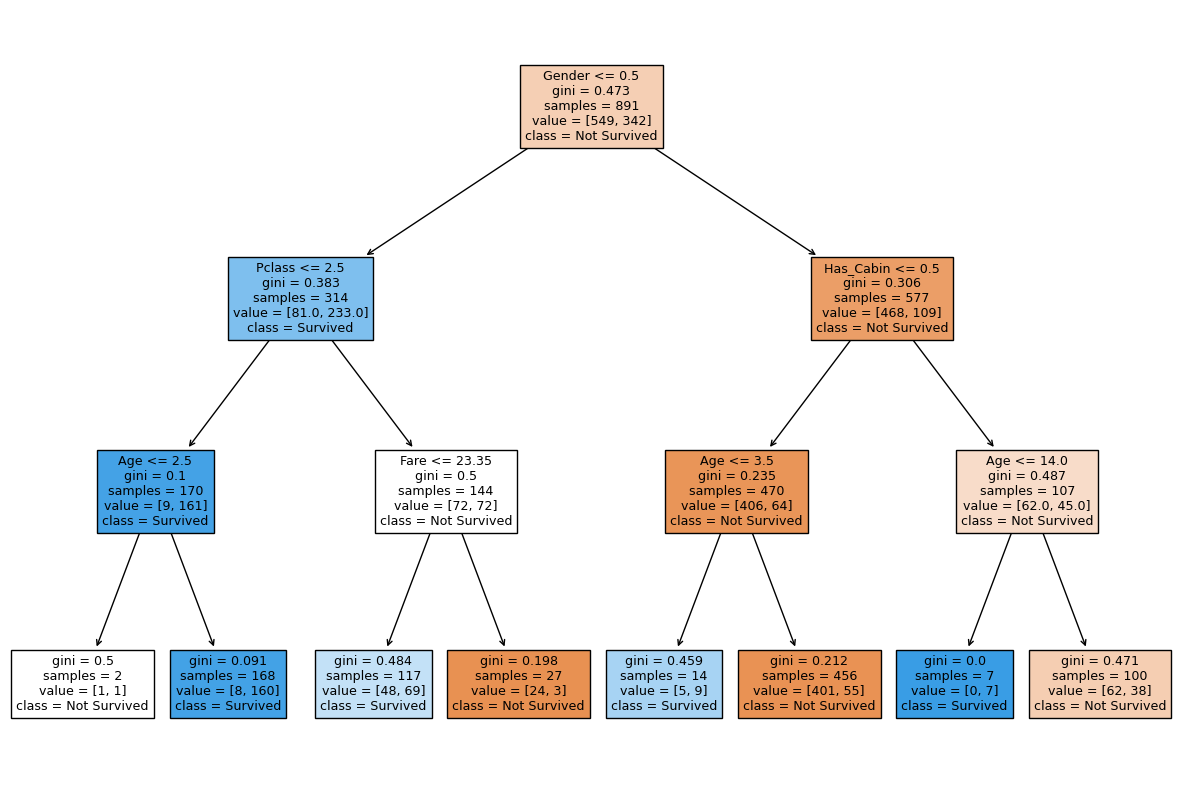

In [192]:

X = data.drop(columns=['Survived'])
y = data['Survived']

max_depth=3
random_state=123123

clf = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)

clf.fit(X, y)

plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

Pclass and Has_Cabin are used to split the decision at depth=2

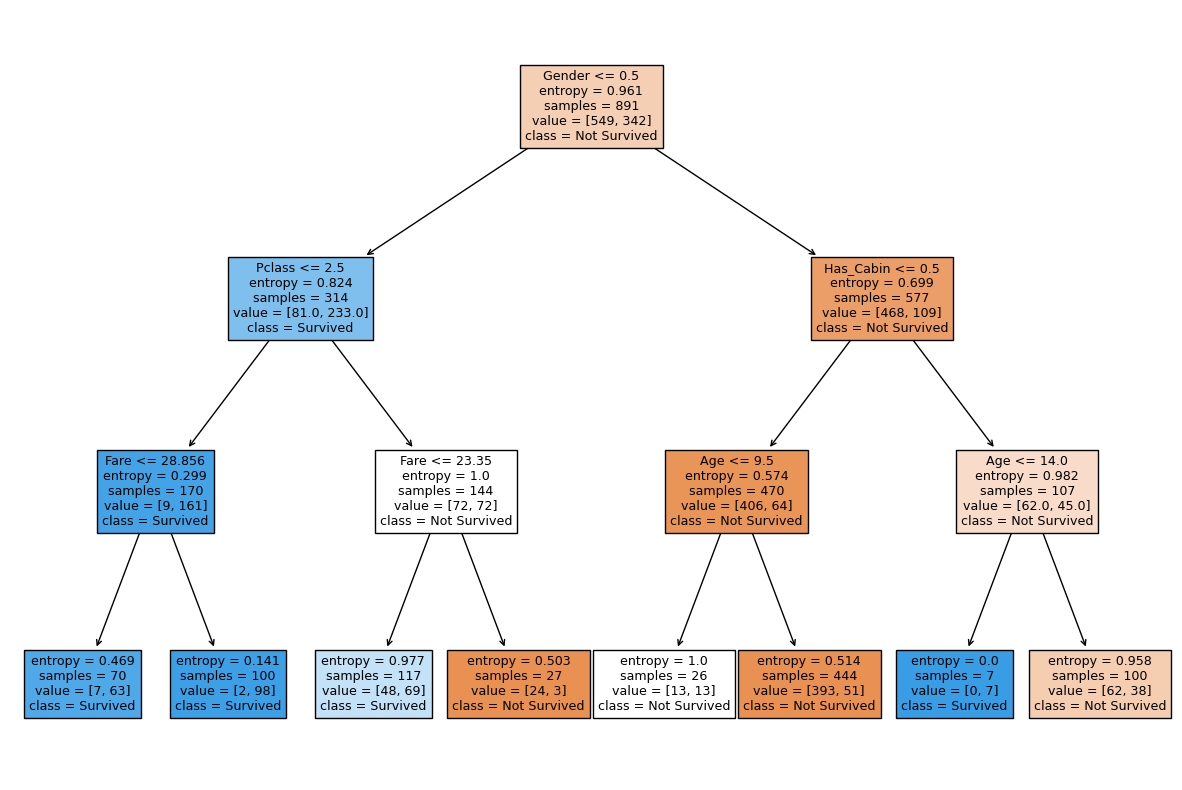

In [193]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=random_state)

clf.fit(X, y)

plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

The set of chosen features at depth=3 {Fare, Age} does not change, however their quantity
and order laeyer does. From Age <= 2.5, Fare <= 23.25, Age <= 3.5, and Age <=
14.0 to Fare <= 28.856, Fare <= 23.35, Age <= 9.5, and Age <= 14.0 respectively.

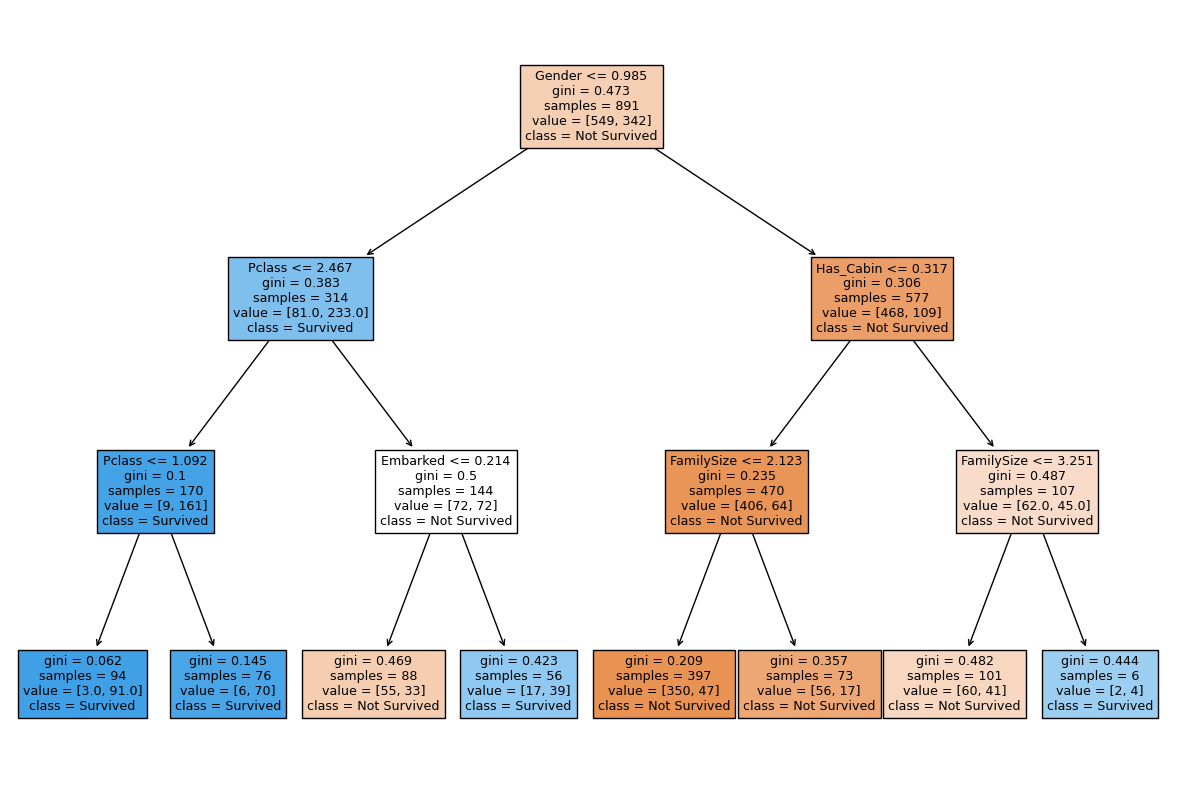

In [194]:
clf = DecisionTreeClassifier(splitter='random', max_depth=max_depth, random_state=random_state)

clf.fit(X, y)

plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

The features at depth=3 do change. From Age <= 2.5, Fare <= 23.25, Age <= 3.5, and Age <=
14.0 to Pclass <= 1.092, Embarked <= 0.214, FamilySize <= 2.123, and FamilySize <= 3.251.

In [195]:

# Define train/val/test ratios
ratios = [(0.6, 0.2, 0.2), (0.7, 0.15, 0.15), (0.8, 0.1, 0.1)]

# Define parameters for decision tree
criteria = ['gini', 'entropy']

for criterion in criteria:
    print(f"Criterion: {criterion}")
    for train_ratio, val_ratio, test_ratio in ratios:
        X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1-train_ratio, random_state=random_state)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_ratio/(val_ratio+test_ratio), random_state=random_state)

        clf = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state=random_state)

        clf.fit(X_train, y_train)

        y_val_pred = clf.predict(X_val)

        val_accuracy = accuracy_score(y_val, y_val_pred)

        y_test_pred = clf.predict(X_test)

        test_accuracy = accuracy_score(y_test, y_test_pred)

        print(f"Train/Val/Test Ratio: {train_ratio}/{val_ratio}/{test_ratio} - Validation Accuracy: {val_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

    print()


Criterion: gini
Train/Val/Test Ratio: 0.6/0.2/0.2 - Validation Accuracy: 0.8371, Test Accuracy: 0.8436
Train/Val/Test Ratio: 0.7/0.15/0.15 - Validation Accuracy: 0.8507, Test Accuracy: 0.8209
Train/Val/Test Ratio: 0.8/0.1/0.1 - Validation Accuracy: 0.8652, Test Accuracy: 0.8222

Criterion: entropy
Train/Val/Test Ratio: 0.6/0.2/0.2 - Validation Accuracy: 0.8202, Test Accuracy: 0.8212
Train/Val/Test Ratio: 0.7/0.15/0.15 - Validation Accuracy: 0.8358, Test Accuracy: 0.7985
Train/Val/Test Ratio: 0.8/0.1/0.1 - Validation Accuracy: 0.8652, Test Accuracy: 0.7667



Increasing the max depth results in the creation of more intricate decision boundaries within the feature space. This complexity enables the model to capture finer patterns present in the training data, potentially leading to higher accuracy on the training set. However, this increase in complexity also poses the risk of overfitting, as the model may start to memorize noise or outliers in the training data rather than learning generalizable patterns. Moreover, deeper trees require more computational resources and time to train due to the need to explore a larger number of possible splits. On the other hand, decreasing the max depth simplifies the decision boundaries created by the tree, making them more interpretable and reducing the risk of overfitting. While shallower trees may sacrifice some accuracy on the training data, they often generalize better to unseen data and are computationally less expensive to train. However, finding the optimal max depth involves navigating the bias-variance tradeoff, balancing model complexity with generalization performance, interpretability, and computational constraints.